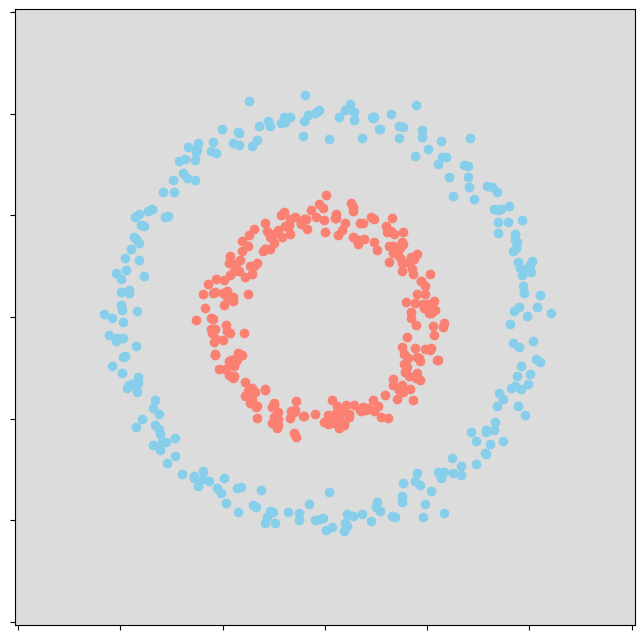

In [53]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from matplotlib import animation
from IPython.core.display import display, HTML

# Creamos nuestros datos artificiales, donde buscaremos clasificar
# dos anillos concéntricos de datos.
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100
# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)
# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)
# Objeto vacío a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5
# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)
# Visualización de la nube de datos
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
plt.tick_params(labelbottom=False, labelleft=False)

Step 0 / 1000 - loss = 0.32457814 -Acc= 0.532
Step 25 / 1000 - loss = 0.28410754 -Acc= 0.564
Step 50 / 1000 - loss = 0.22732341 -Acc= 0.638
Step 75 / 1000 - loss = 0.1938158 -Acc= 0.792
Step 100 / 1000 - loss = 0.17327198 -Acc= 0.872
Step 125 / 1000 - loss = 0.15639292 -Acc= 0.894
Step 150 / 1000 - loss = 0.14151879 -Acc= 0.916
Step 175 / 1000 - loss = 0.12788936 -Acc= 0.928
Step 200 / 1000 - loss = 0.115631215 -Acc= 0.944
Step 225 / 1000 - loss = 0.10484524 -Acc= 0.956
Step 250 / 1000 - loss = 0.09531029 -Acc= 0.96
Step 275 / 1000 - loss = 0.08645811 -Acc= 0.964
Step 300 / 1000 - loss = 0.07860019 -Acc= 0.974
Step 325 / 1000 - loss = 0.07139517 -Acc= 0.98
Step 350 / 1000 - loss = 0.064833015 -Acc= 0.982
Step 375 / 1000 - loss = 0.058733877 -Acc= 0.984
Step 400 / 1000 - loss = 0.05355392 -Acc= 0.996
Step 425 / 1000 - loss = 0.04919066 -Acc= 0.996
Step 450 / 1000 - loss = 0.045401093 -Acc= 0.998
Step 475 / 1000 - loss = 0.04202621 -Acc= 0.998
Step 500 / 1000 - loss = 0.039012384 -Acc= 0

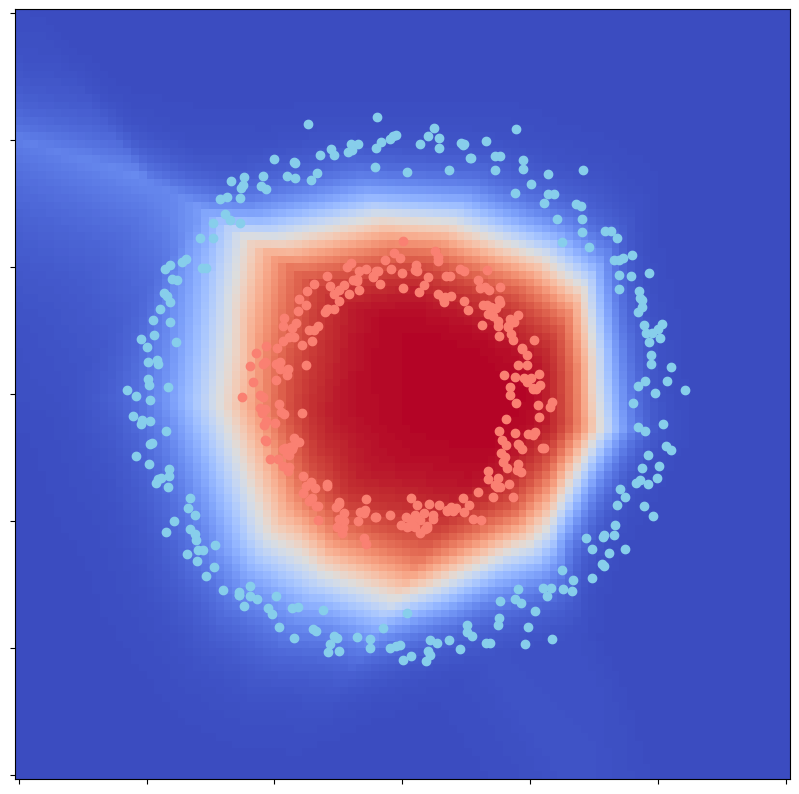

In [58]:


# Definimos los puntos de entrada de la red, para la matriz X e y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

# Learning rate y número de neuronas por capa.
lr = 0.01
nn = [2, 16, 8, 1]

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

# Número de pasos de entrenamiento.
n_steps = 1000
iPY = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(n_steps):
        _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={iX: X, iY: Y})
        if step % 25 == 0:
            acc = np.mean(np.round(_pY)==Y)
            print('Step', step,'/',n_steps,'- loss =',_loss, '-Acc=', acc)
            _pY=sess.run(pY, feed_dict={iX: _pX}).reshape(res, res)
            iPY.append(_pY)



ims = []
fig = plt.figure(figsize=(10, 10))
print("---Generando animación----")

for fr in range(len(iPY)):
    im=plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")

    plt.tick_params(labelbottom=False, labelleft=False)
    ims.append([im])


ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_html5_video())